In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
import pipeline as pp
import importlib
importlib.reload (pp)
import pipeline as pp

## Parameters

In [36]:
MDataFiles_Stage1_path = 'Data_ML/MDataFiles_Stage1/'
start = 1985

# Datasets to add
data = ['features/stats_v1.csv']

# Features where the difference needs to be computed
diff = []

## Prediction

In [37]:
dfs = []
for s in [2015, 2016, 2017, 2018, 2019]:
    p = pp.pipeline(path=MDataFiles_Stage1_path,  season=s, start = start)
    for d in data:
        p.add_team_data(d)
    if len(diff)>0:
        p.compute_differences(diff)
    p.train_model()
    dfs.append(p.predict(out=None))
pred = pd.concat(dfs)
pred.head(10)

History merged with features/stats_v1.csv
Model trained on 3832 matches
4556 matches to predict generated
Generated matches merged with features/stats_v1.csv

History merged with features/stats_v1.csv
Model trained on 3966 matches
4556 matches to predict generated
Generated matches merged with features/stats_v1.csv

History merged with features/stats_v1.csv
Model trained on 4100 matches
4556 matches to predict generated
Generated matches merged with features/stats_v1.csv

History merged with features/stats_v1.csv
Model trained on 4234 matches
4556 matches to predict generated
Generated matches merged with features/stats_v1.csv

History merged with features/stats_v1.csv
Model trained on 4368 matches
4556 matches to predict generated
Generated matches merged with features/stats_v1.csv



,Année,ID_Team1,ID_Team2,Predic_Team1
0,2015,1437,1438,0.40
1,2015,1437,1328,0.24
2,2015,1437,1257,0.23
3,2015,1437,1320,0.42
4,2015,1437,1344,0.23
5,2015,1437,1277,0.25
6,2015,1437,1301,0.24
7,2015,1437,1261,0.26
8,2015,1437,1208,0.29
9,2015,1437,1129,0.29


In [25]:
import time
t0=time.time()
df = pred

results = {}
for index, row in df.iterrows():
    i, j = row['ID_Team1'], row['ID_Team2']
    season = row['Année']
    p = row['Predic_Team1']
    
    if i> j:
        i, j = j, i
        p = 1-p
    if (i, j, season) not in results.keys():
        results[(i, j, season)]=[p]
    else:
        results[(i, j, season)].append(p)

data = []
for k, v in results.items():
    d = {
        "Année":int(k[2]),
        "ID_Team1":int(k[0]),
        "ID_Team2":int(k[1]),
        "Pred_1":v[0],
        "Pred_2":v[1],
        "Predic_Team1":(v[0]+v[1])/2
    }
    data.append(d)
data = pd.DataFrame(data)
print("Execution time: %fs"%(time.time() - t0))
data.head()

Execution time: 5.345362s


,Année,ID_Team1,ID_Team2,Pred_1,Pred_2,Predic_Team1
0,2015,1437,1438,0.32,0.52,0.42
1,2015,1328,1437,0.72,0.72,0.72
2,2015,1257,1437,0.92,0.72,0.82
3,2015,1320,1437,0.72,0.56,0.64
4,2015,1344,1437,0.60,0.64,0.62


Text(0, 0.5, 'proba A in BvA')

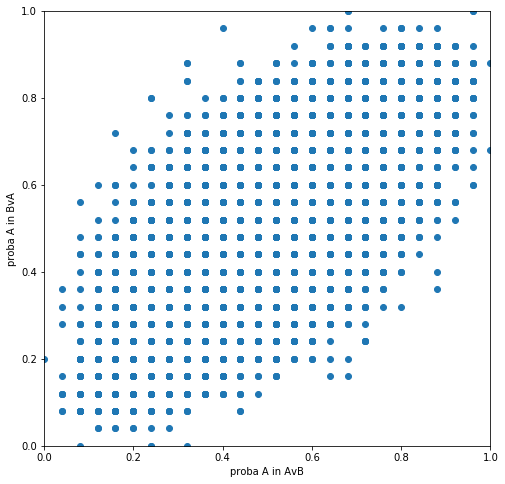

In [26]:
plt.figure(figsize=(8, 8))
plt.scatter(data['Pred_1'], data['Pred_2'])
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("proba A in AvB")
plt.ylabel("proba A in BvA")


In [27]:
reduced_data = data.drop(columns=['Pred_1', 'Pred_2'])
reduced_data.sort_values(['Année', 'ID_Team1', 'ID_Team2'], inplace=True)

#On crée notre fichier de soumission
submission_file=pd.DataFrame(columns=['ID', 'Pred'], index=[str(j) for j in range(11390)])

# On le remplit
sub = pd.DataFrame()
sub['ID'] = reduced_data['Année'].astype(str) + '_' + reduced_data['ID_Team1'].astype(str) + '_' + reduced_data['ID_Team2'].astype(str)
sub['Pred']= reduced_data['Predic_Team1']
sub.head()

,ID,Pred
884,2015_1107_1112,0.86
887,2015_1107_1116,0.72
885,2015_1107_1124,0.74
847,2015_1107_1125,0.54
628,2015_1107_1129,0.62


In [28]:
sub.to_csv("to_submit.csv")

## Issues analysis
Tools to check why it doesn't work

In [27]:
def filter_ts(df, teamID, season):
    a = df[df['TeamID']==teamID]
    return  a[a['Season']==season]

In [28]:
df = pd.read_csv(data[0])
filter_ts(df, 1314, 1985)

,Victoires_MM,TeamID,Season,Nombre_victoires,Nombre_défaites,Nombre_matchs,Pourcentage_Victoire,Buts_moyens_encaissés,Buts_moyens_marqués,Moyenne_diff_score,Pourcentage_V_terrain_adverse,Mental,Evolution_2_Last_years,Qualité_défense,Fools,Blocks,Steals,Ancienneté


In [29]:
p.match_histo

,Season,ID_Team1,ID_Team2,Team1_Home,Team2_Home,TeamID_Team1,Nombre_victoires_Team1,Nombre_défaites_Team1,Nombre_matchs_Team1,Pourcentage_Victoire_Team1,...,Buts_moyens_marqués_Team2,Moyenne_diff_score_Team2,Pourcentage_V_terrain_adverse_Team2,Mental_Team2,Evolution_2_Last_years_Team2,Qualité_défense_Team2,Fools_Team2,Blocks_Team2,Steals_Team2,Ancienneté_Team2
0,1985,1116,1234,0,0,1116.0,22.0,13.0,35.0,0.628571,...,70.857143,2.892857,0.777778,0.063492,0.126050,0.230580,21.642857,2.607143,6.714286,0.0
1,1985,1120,1345,0,0,1120.0,20.0,12.0,32.0,0.625000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1985,1207,1250,0,0,1207.0,30.0,17.0,47.0,0.638298,...,82.966667,3.533333,0.250000,-0.116667,0.000813,0.269986,22.066667,5.466667,7.933333,0.0
3,1985,1229,1425,0,0,1229.0,21.0,13.0,34.0,0.617647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1985,1242,1325,0,0,1242.0,24.0,13.0,37.0,0.648649,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1985,1246,1449,0,0,1246.0,18.0,11.0,29.0,0.620690,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1985,1256,1338,0,0,1256.0,28.0,23.0,51.0,0.549020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1985,1260,1233,0,0,1260.0,27.0,19.0,46.0,0.586957,...,52.268293,-0.414634,0.333333,-0.276423,0.169756,0.170089,12.951220,2.731707,5.439024,0.0
8,1985,1314,1292,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1985,1323,1333,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
h = p.match_histo['Nombre_victoires_Team1']

In [18]:
len(h)

3832

In [19]:
h.count()

2056